In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Library**

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install --ignore-installed Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [60]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
!sudo apt install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 213 kB 5.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fastwer-0.1.3.tar.gz (4.6 kB)
  Created wheel for fastwer: filename=fastwer-0.1.3-cp37-cp37m-linux_x86_64.whl size=638453 sha256=131a9bb2f75e4ee9a8dd0cf2f99dceaf05c0640cfde2b457cd8d6b9ab6f751d0
  Stored in directory: /root/.cache/pip/wheels/c8/b6/93/419e758f0c0176d311602763520bcfdec18107be1f15186fe6
Successfully built fastwer
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pytesseract
import fastwer
from pytesseract import Output
from PIL import Image

In [5]:
import io
import time

from datetime import timedelta

import logging
logging.basicConfig(level=logging.INFO)
import gensim

from gensim.models.wrappers import FastText
import re

INFO:summarizer.preprocessing.cleaner:'pattern' package not found; tag filters are not available for English


#**Read Image**

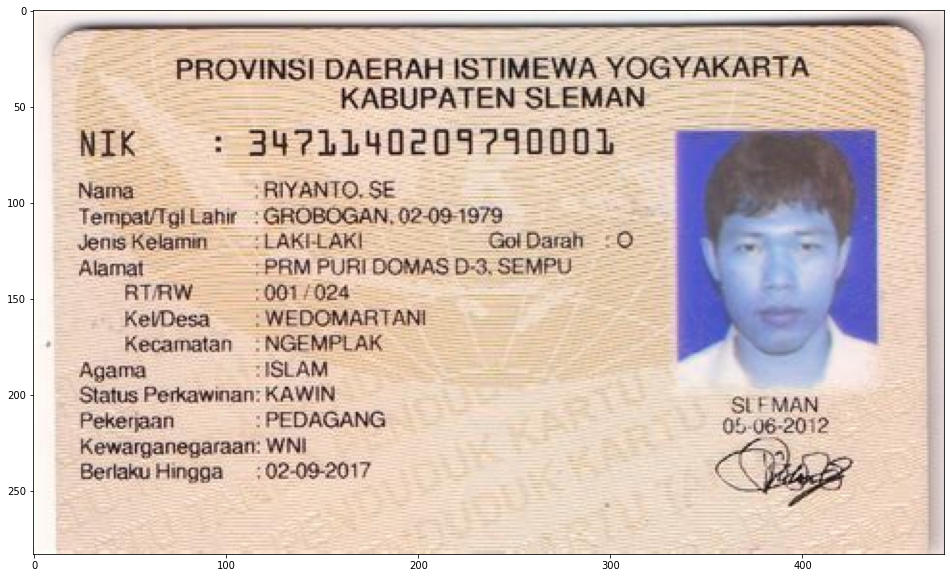

In [202]:
image = cv2.imread("/content/drive/MyDrive/Bangkit/24.jpg")
plt.figure(figsize = (40,10))
plt.imshow(image)

In [203]:
image.shape

(283, 474, 3)

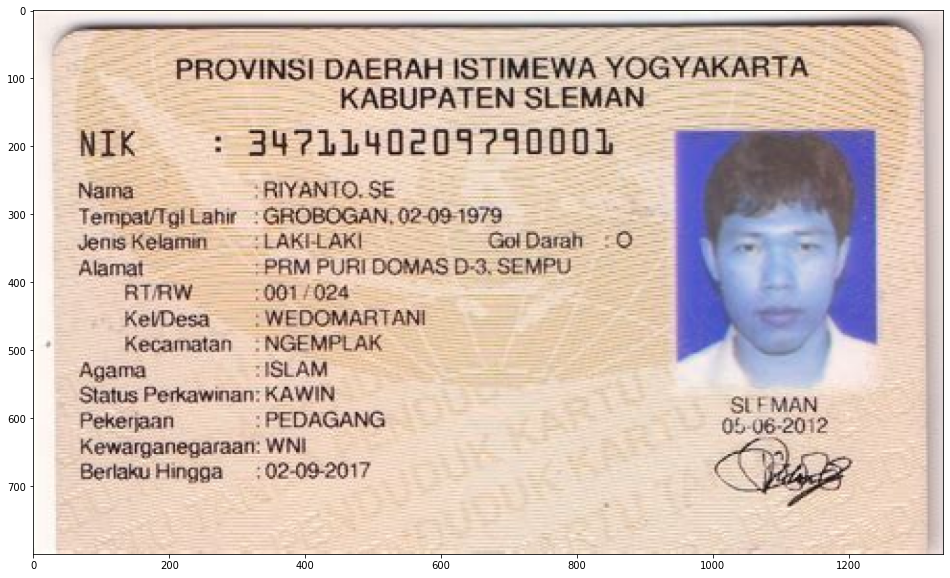

In [204]:
r = 800 / image.shape[0]
dim = (int(image.shape[1] * r), 800)

image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
plt.figure(figsize = (40,10))
plt.imshow(image)

In [205]:
image.shape

(800, 1339, 3)

#**Pre-Processing Image**

1. Convert image to 1D

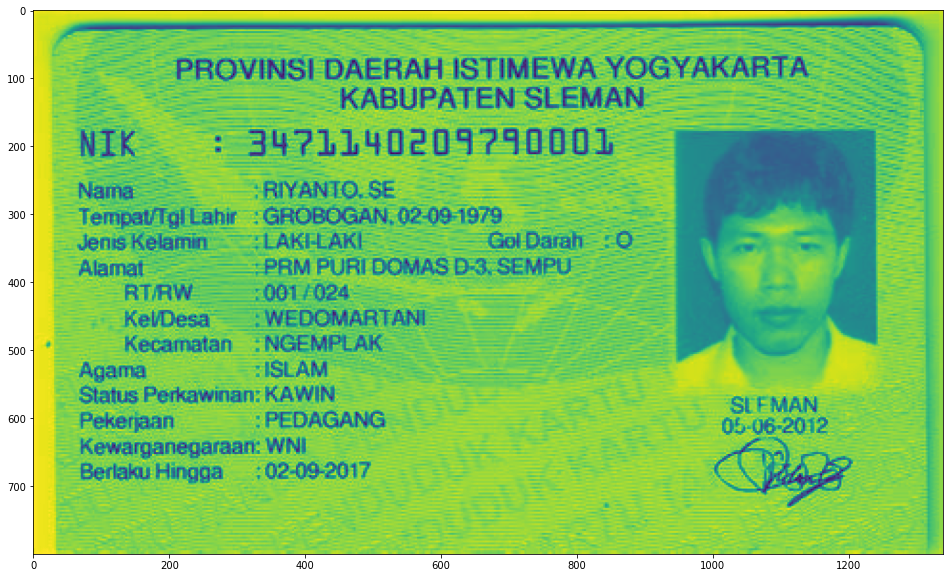

In [206]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (40,10))
plt.imshow(gray)

2. Convert into black and white

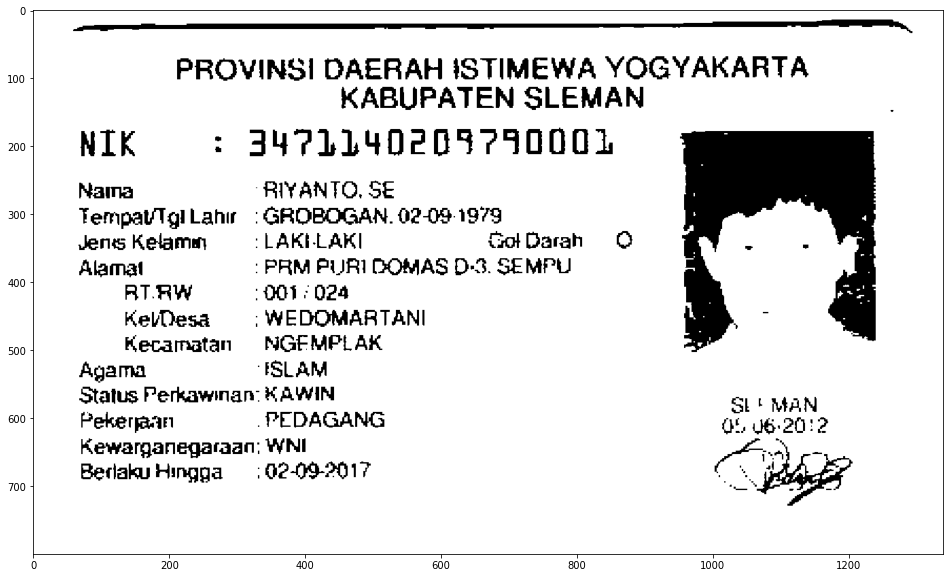

In [207]:
thresh = 127
blackWhite = cv2.threshold(gray,thresh,255,cv2.THRESH_BINARY)[1]
plt.figure(figsize = (40,10))
plt.imshow(blackWhite, cmap="gray")

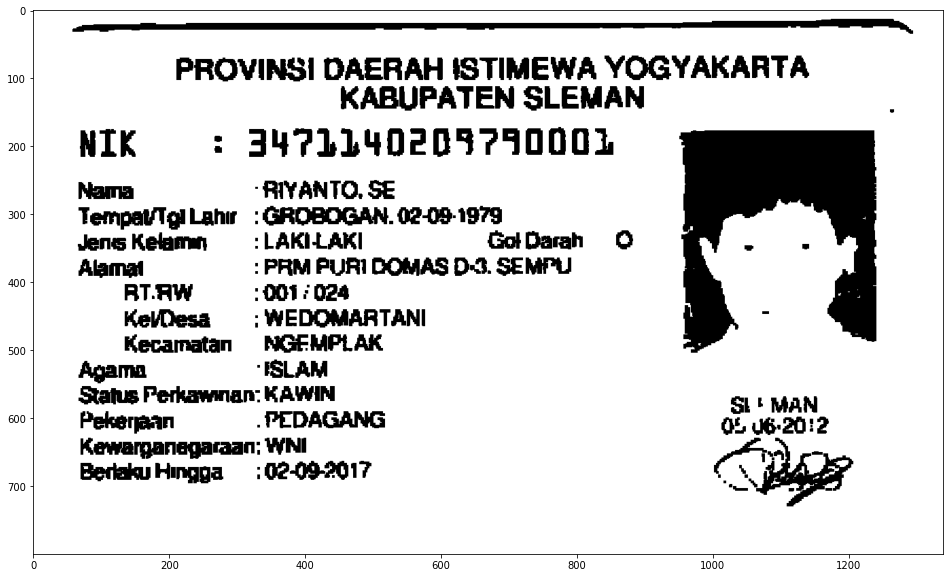

In [208]:
kernel = np.ones((3,3), np.uint8)

img_erosion = cv2.erode(blackWhite, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_erosion, cmap="gray")

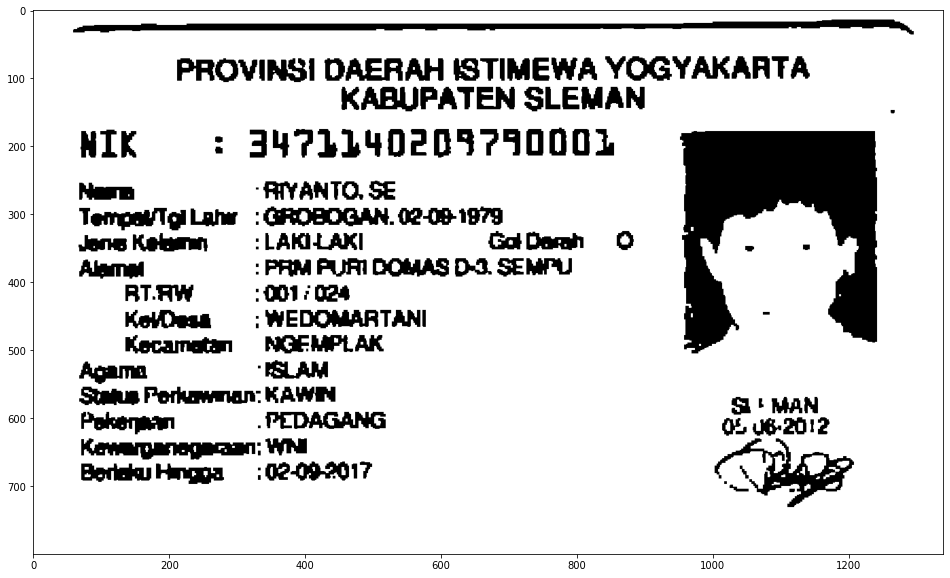

In [209]:
kernel = np.ones((2,2), np.uint8)

img_closing = cv2.morphologyEx(img_erosion, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize = (30,10))
plt.imshow(img_closing, cmap="gray")

# **Get text from image**

In [210]:
!pip install -U pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
data = pytesseract.image_to_data(img_closing, output_type='data.frame')
data

level  page_num  block_num  par_num  line_num  word_num  left  top  width  \
0       1         1          0        0         0         0     0    0   1339   
1       2         1          1        0         0         0    59   14   1237   
2       3         1          1        1         0         0    59   14   1237   
3       4         1          1        1         1         0    59   14   1237   
4       5         1          1        1         1         1    59   14   1237   
5       2         1          2        0         0         0   212   68    931   
6       3         1          2        1         0         0   212   68    931   
7       4         1          2        1         1         0   212   68    931   
8       5         1          2        1         1         1   212   71    202   
9       5         1          2        1         1         2   429   71    175   
10      5         1          2        1         1         3   619   70    211   
11      5         1          2        1         1         4   842   68    301   
12      2         1          3        0         0         0    67  113    994   
13      3         1          3        1         0         0    67  113    994   
14      4         1          3        1         1         0   454  113    446   
15      5         1          3        1         1         1   454  113    255   
16      5         1          3        1         1         2   723  113    177   
17      4         1          3        1         2         0    70  173    785   
18      5         1          3        1         2         1    70  176     82   
19      5         1          3        1         2         2   268  186     11   
20      5         1          3        1         2         3   319  173    536   
21      4         1          3        1         3         0    68  251    465   
22      5         1          3        1         3         1    68  254     81   
23      5         1          3        1         3         2     0    0   1339   
24      5         1          3        1         3         3   328  252    158   
25      5         1          3        1         3         4   494  251     39   
26      4         1          3        1         4         0    68  289    623   
27      5         1          3        1         4         1    68  291    157   
28      5         1          3        1         4         2   232  292     69   
29      5         1          3        1         4         3   328  289    203   
30      5         1          3        1         4         4   537  289    154   
31      4         1          3        1         5         0    67  325    994   
32      5         1          3        1         5         1    67  331     71   
33      5         1          3        1         5         2   147  328    110   
34      5         1          3        1         5         3   328  336      4   
35      5         1          3        1         5         4   342  328    143   
36      5         1          3        1         5         5   670  325    140   
37      5         1          3        1         5         6   859  325     25   
38      5         1          3        1         5         7  1048  347     13   
39      4         1          3        1         6         0    68  365    725   
40      5         1          3        1         6         1    68  367     95   
41      5         1          3        1         6         2   328  373      4   
42      5         1          3        1         6         3   342  367     67   
43      5         1          3        1         6         4   418  365     73   
44      5         1          3        1         6         5   500  365    112   
45      5         1          3        1         6         6   621  365     54   
46      5         1          3        1         6         7   683  365    110   
47      4         1          3        1         7         0   136  404    330   
48      5         1          3     

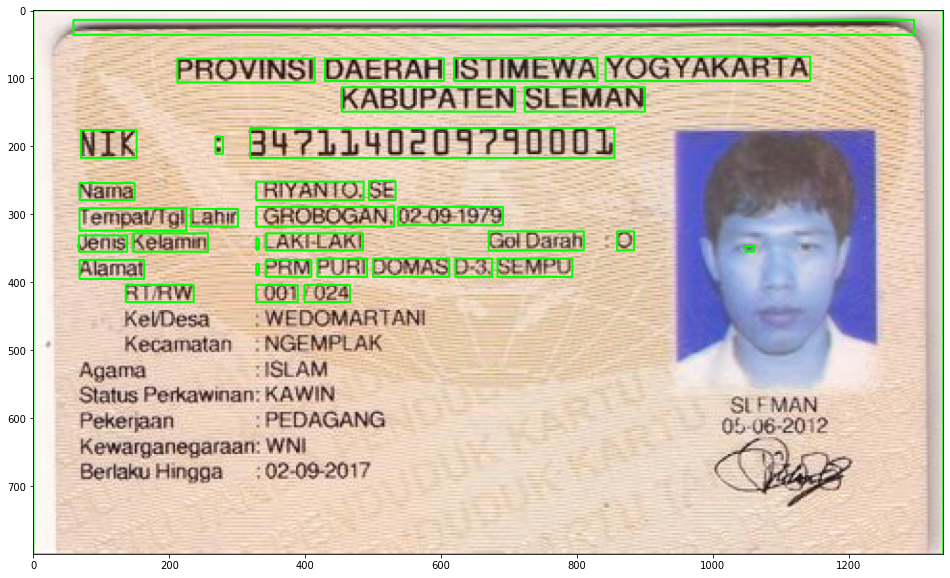

In [212]:
for box in range(len(data)):
  if data["conf"][box] >= 0:
    image = cv2.rectangle(image, (data['left'][box], data['top'][box]), 
                          (data['left'][box]+data['width'][box], data['top'][box]+data['height'][box]), 
                          (0,255,0),2)

plt.figure(figsize = (40,10))
plt.imshow(image)

In [213]:
result = pytesseract.image_to_string(img_erosion)
print(result)

ee Y

PROVINSI DAERAH ISTIMEWA YOGYAKARTA

KABUPATEN SLEMAN
NIK > 3471140209790001
Nama “RIVANTO, SE
TempatTgi Lah : GROBOGAN. 02-09-1979
Jens Kelamn : LAKI-LAKI GoDarah © - .
Alamat : PRM PURI GOMAS D3. SEMPU
RT.AW ON 024

KelDesa ; WEDOMARTANI -
Kecamatan NGEMPLAK

Agama “ISLAM
Status Perkawmnan: KAWIN
Pekerjaan ‘PEDAGANG Si * MAN

Of 62012
Kewarganagaraan: WNI ey
BerakuHingga =: 02-09-2017 C Pee



In [214]:
list_value = result.split("\n")
list_value

['ee Y',
 '',
 'PROVINSI DAERAH ISTIMEWA YOGYAKARTA',
 '',
 'KABUPATEN SLEMAN',
 'NIK > 3471140209790001',
 'Nama “RIVANTO, SE',
 'TempatTgi Lah : GROBOGAN. 02-09-1979',
 'Jens Kelamn : LAKI-LAKI GoDarah © - .',
 'Alamat : PRM PURI GOMAS D3. SEMPU',
 'RT.AW ON 024',
 '',
 'KelDesa ; WEDOMARTANI -',
 'Kecamatan NGEMPLAK',
 '',
 'Agama “ISLAM',
 'Status Perkawmnan: KAWIN',
 'Pekerjaan ‘PEDAGANG Si * MAN',
 '',
 'Of 62012',
 'Kewarganagaraan: WNI ey',
 'BerakuHingga =: 02-09-2017 C Pee',
 '\x0c']

# **Koreksi Typo**

In [215]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('/content/drive/MyDrive/Bangkit/katadasar.txt').read()))

def P(word, N=sum(WORDS.values())):
    # "Probability of `word`."
    return WORDS[word] / N

def correction(word):
    # "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    # "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    # "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    # "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)] # [('', 'kemarin'), ('k', 'emarin'), ('ke', 'marin'), dst]
    deletes    = [L + R[1:]               for L, R in splits if R] # ['emarin', 'kmarin', 'kearin', dst]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1] # ['ekmarin', 'kmearin', 'keamrin', dst]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters] # ['aemarin', 'bemarin', 'cemarin', dst]
    inserts    = [L + c + R               for L, R in splits for c in letters] # ['akemarin', 'bkemarin', 'ckemarin', dst]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    # "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [216]:
new_list = []
for string in list_value:
  if string.isspace() or len(string)==0:
    continue
  lower_string = string.lower()
  no_punc_string = re.sub(r'[^\w\s]','', lower_string)
  no_wspace_string = no_punc_string.replace('\n', ' ')
  no_punc_string = re.sub(r'[^\w\s]','', lower_string)
  no_wspace_string = no_punc_string.replace('\n', ' ')
  no_wspace_string = re.sub(' +', ' ', no_wspace_string)
  new_list.append(correction(no_wspace_string))

new_list

['ee y',
 'provinsi daerah istimewa yogyakarta',
 'kabupaten sleman',
 'nik 3471140209790001',
 'nama rivanto se',
 'tempattgi lah grobogan 02091979',
 'jens kelamn lakilaki godarah ',
 'alamat prm puri gomas d3 sempu',
 'rtaw on 024',
 'keldesa wedomartani ',
 'kecamatan ngemplak',
 'agama islam',
 'status perkawmnan kawin',
 'pekerjaan pedagang si man',
 'of 62012',
 'kewarganagaraan wni ey',
 'berakuhingga 02092017 c pee']

In [217]:
new_value = []
for string in new_list:
  temp = ''
  data = string.split(" ")
  for s in data:
    # print(correction(s))
    temp = temp + " " + correction(s)
  new_value.append(temp[1:])

In [218]:
new_value

['e y',
 'provinsi darah istimewa yogyakarta',
 'kabupaten sleman',
 'nik 3471140209790001',
 'nama rivanto e',
 'tempattgl lam grobogan 02091979',
 'jenis kelamin lakilaki darah o',
 'alamat r puri gomas d sempu',
 'rtrw o 024',
 'keldesa wedomartani o',
 'kecamatan ngemplak',
 'agama islam',
 'status perkawinan kawin',
 'pekerjaan pedagang is ab',
 'o 62012',
 'kewarganegaraan wni y',
 'berakuhingga 02092017 c p']

In [219]:
kabupaten = new_value[1]
kabupaten

'provinsi darah istimewa yogyakarta'

In [220]:
list_string = no_wspace_string.split()
new_list = []
for word in list_string:
  new_list.append(correction(word))

# **Get value**

In [221]:
def txt_to_list(path):
  # opening the file in read mode
  my_file = open(path, "r")
    
  # reading the file
  data = my_file.read()
    
  # replacing end splitting the text 
  # when newline ('\n') is seen.
  data_into_list = data.split("\n")
  my_file.close()
  return data_into_list

In [222]:
prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
pair = {}
for string in new_value:
  temp = string.split(' ')
  new_temp = []
  flag = False
  keyFlag = False
  key = ''
  for word in temp:
    if flag == False and word in prevalue:
      flag = True
      keyFlag = True
      key = word
    if flag and keyFlag:
      pair[key] = ''
      keyFlag = False
    if flag and not keyFlag:
      pair[key] = pair[key] + " " + word

In [223]:
new_pair = {}
for string in pair.keys():
  # print(pair[string])
  temp = pair[string].split(' ')
  temp = temp[2:]
  new_pair[string] = ' '.join(temp)

In [224]:
new_pair['kabupaten'] = kabupaten
new_pair

{'agama': 'islam',
 'kabupaten': 'provinsi darah istimewa yogyakarta',
 'kecamatan': 'ngemplak',
 'kelamin': 'lakilaki darah o',
 'keldesa': 'wedomartani o',
 'kewarganegaraan': 'wni y',
 'nama': 'rivanto e',
 'nik': '3471140209790001',
 'pekerjaan': 'pedagang is ab',
 'perkawinan': 'kawin',
 'provinsi': 'darah istimewa yogyakarta',
 'rtrw': 'o 024',
 'tempattgl': 'lam grobogan 02091979'}

In [225]:
darah = new_pair['kelamin'].split(' ')
darah

new_pair['kelamin'] = darah[0]
new_pair['darah'] = darah[-1]

# **Convert to JSON**

In [226]:
list_key = new_pair.keys()
list_key

dict_keys(['provinsi', 'nik', 'nama', 'tempattgl', 'kelamin', 'rtrw', 'keldesa', 'kecamatan', 'agama', 'perkawinan', 'pekerjaan', 'kewarganegaraan', 'kabupaten', 'darah'])

In [227]:
new_dict = {}

if 'provinsi' in list_key:
  new_dict['province'] = new_pair['provinsi']

if 'kabupaten' in list_key:
  new_dict['district'] = new_pair['kabupaten']

if 'nik' in list_key:
  new_dict['id_number'] = new_pair['nik']

if 'nama' in list_key:
  new_dict['name'] = new_pair['nama']

if 'tempattgl' in list_key:
  new_dict['place_date_of_birth'] = new_pair['tempattgl']

if 'kelamin' in list_key:
  new_dict['gender'] = new_pair['kelamin']

if 'darah' in list_key:
  new_dict['blood_type'] = new_pair['darah']

if 'keldesa' in list_key:
  new_dict['address'] = new_pair['keldesa']

if 'rtrw' in list_key:
  new_dict['neighborhood'] = new_pair['rtrw']

if 'keldesa' in list_key:
  new_dict['village'] = new_pair['keldesa']

if 'kecamatan' in list_key:
  new_dict['subdistrict'] = new_pair['kecamatan']

if 'agama' in list_key:
  new_dict['religion'] = new_pair['agama']

if 'perkawinan' in list_key:
  new_dict['marital_status'] = new_pair['perkawinan']

if 'pekerjaan' in list_key:
  new_dict['occupation'] = new_pair['pekerjaan']

if 'kewarganegaraan' in list_key:
  new_dict['nationality'] = new_pair['kewarganegaraan']

if 'hingga' in list_key:
  new_dict['expiry_date'] = new_pair['hingga']

In [228]:
new_dict 

{'address': 'wedomartani o',
 'blood_type': 'o',
 'district': 'provinsi darah istimewa yogyakarta',
 'gender': 'lakilaki',
 'id_number': '3471140209790001',
 'marital_status': 'kawin',
 'name': 'rivanto e',
 'nationality': 'wni y',
 'neighborhood': 'o 024',
 'occupation': 'pedagang is ab',
 'place_date_of_birth': 'lam grobogan 02091979',
 'province': 'darah istimewa yogyakarta',
 'religion': 'islam',
 'subdistrict': 'ngemplak',
 'village': 'wedomartani o'}

In [229]:
res = {}

for key in new_dict.keys():
  res[key] = new_dict[key].upper()

res

{'address': 'WEDOMARTANI O',
 'blood_type': 'O',
 'district': 'PROVINSI DARAH ISTIMEWA YOGYAKARTA',
 'gender': 'LAKILAKI',
 'id_number': '3471140209790001',
 'marital_status': 'KAWIN',
 'name': 'RIVANTO E',
 'nationality': 'WNI Y',
 'neighborhood': 'O 024',
 'occupation': 'PEDAGANG IS AB',
 'place_date_of_birth': 'LAM GROBOGAN 02091979',
 'province': 'DARAH ISTIMEWA YOGYAKARTA',
 'religion': 'ISLAM',
 'subdistrict': 'NGEMPLAK',
 'village': 'WEDOMARTANI O'}

In [230]:
import json 

json_object = json.dumps(res, indent = 4)

In [231]:
print(json_object)

{
    "province": "DARAH ISTIMEWA YOGYAKARTA",
    "district": "PROVINSI DARAH ISTIMEWA YOGYAKARTA",
    "id_number": "3471140209790001",
    "name": "RIVANTO E",
    "place_date_of_birth": "LAM GROBOGAN 02091979",
    "gender": "LAKILAKI",
    "blood_type": "O",
    "address": "WEDOMARTANI O",
    "neighborhood": "O 024",
    "village": "WEDOMARTANI O",
    "subdistrict": "NGEMPLAK",
    "religion": "ISLAM",
    "marital_status": "KAWIN",
    "occupation": "PEDAGANG IS AB",
    "nationality": "WNI Y"
}


#**Metrics Evaluation - 1**

In [38]:
new_dict

{'address': 'rawa buaya',
 'blood_type': 'o',
 'district': 'jakarta barat',
 'expiry_date': '25122016 o',
 'gender': 'lakilaki',
 'id_number': '3173012512720017',
 'marital_status': 'kawin jakarta barat',
 'name': 'antonius natanael is',
 'nationality': 'wni tomy',
 'neighborhood': '008 010',
 'occupation': 'karyawan swasta t22011',
 'place_date_of_birth': 'lahir gisting 25121972',
 'province': 'dki jakarta',
 'religion': 'kristen o',
 'subdistrict': 'cengkareng',
 'village': 'rawa buaya'}

In [69]:
output = pd.DataFrame(list(new_dict.items()), columns = ['information','value'])

In [51]:
output['real_output'] = ''
output['cer'] = ''
output['wer'] = ''

In [55]:
output.loc[output['information'] == 'province', 'real_output'] = "dki jakarta"
output.loc[output['information'] == 'district', 'real_output'] = "jakarta barat"
output.loc[output['information'] == 'id_number', 'real_output'] = "3173012512720017"
output.loc[output['information'] == 'name', 'real_output'] = "antonius natanael k se"
output.loc[output['information'] == 'place_date_of_birth', 'real_output'] = "gisting 25121972"
output.loc[output['information'] == 'gender', 'real_output'] = "lakilaki"
output.loc[output['information'] == 'blood_type', 'real_output'] = "o"
output.loc[output['information'] == 'address', 'real_output'] = "carina sayang blok z no 27"
output.loc[output['information'] == 'neighborhood', 'real_output'] = "004 010"
output.loc[output['information'] == 'village', 'real_output'] = "rawa buaya"
output.loc[output['information'] == 'subdistrict', 'real_output'] = "cengkareng"
output.loc[output['information'] == 'religion', 'real_output'] = "kristen"
output.loc[output['information'] == 'marital_status', 'real_output'] = "kawin"
output.loc[output['information'] == 'occupation', 'real_output'] = "karyawan swasta"
output.loc[output['information'] == 'nationality', 'real_output'] = "wni"
output.loc[output['information'] == 'expiry_date', 'real_output'] = "25122016"

In [70]:
output

information                   value
0              province             dki jakarta
1              district           jakarta barat
2             id_number        3173012512720017
3                  name    antonius natanael is
4   place_date_of_birth  lahir gisting 25121972
5                gender                lakilaki
6            blood_type                       o
7               address              rawa buaya
8          neighborhood                 008 010
9               village              rawa buaya
10          subdistrict              cengkareng
11             religion               kristen o
12       marital_status     kawin jakarta barat
13           occupation  karyawan swasta t22011
14          nationality                wni tomy
15          expiry_date              25122016 o

In [67]:
for index, row in output.iterrows():
  cer = fastwer.score_sent(row['value'], row['real_output'], char_level=True)
  wer = fastwer.score_sent(row['value'], row['real_output'], char_level=False)
  output.loc[output['information'] == row['information'], 'cer'] = round(cer,2) 
  output.loc[output['information'] == row['information'], 'wer'] = round(wer,2)

output

information                   value                 real_output  \
0              province             dki jakarta                 dki jakarta   
1              district           jakarta barat               jakarta barat   
2             id_number        3173012512720017            3173012512720017   
3                  name    antonius natanael is      antonius natanael k se   
4   place_date_of_birth  lahir gisting 25121972            gisting 25121972   
5                gender                lakilaki                    lakilaki   
6            blood_type                       o                           o   
7               address              rawa buaya  carina sayang blok z no 27   
8          neighborhood                 008 010                     004 010   
9               village              rawa buaya                  rawa buaya   
10          subdistrict              cengkareng                  cengkareng   
11             religion               kristen o                     kristen   
12       marital_status     kawin jakarta barat                       kawin   
13           occupation  karyawan swasta t22011             karyawan swasta   
14          nationality                wni tomy                         wni   
15          expiry_date              25122016 o                    25122016   

        cer    wer  
0       0.0    0.0  
1       0.0    0.0  
2       0.0    0.0  
3    13.636   50.0  
4      37.5   50.0  
5       0.0    0.0  
6       0.0    0.0  
7    80.769  100.0  
8    14.286   50.0  
9       0.0    0.0  
10      0.0    0.0  
11   28.571  100.0  
12    280.0  200.0  
13   46.667   50.0  
14  166.667  100.0  
15     25.0  100.0

In [68]:
mean_cer = output['cer'].mean()
mean_wer = output['wer'].mean()

print('mean CER is {}%, mean WER is {}%'.format(mean_cer,mean_wer))

mean CER is 43.3185%, mean WER is 50.0%


In [ ]:
# def get_pair(data, prevalue, postvalue):
#   pair = {}
#   flag = False
#   key = ''
#   for word in data:
#     temp = ''
#     keyFlag = False
#     # print("true "+word)
#     if flag == True and (word in prevalue) or (word in postvalue):
#       flag = False
#     if flag==False and len(word)>1 and (word in prevalue):
#       flag = True
#       keyFlag = True
#     if keyFlag == True:
#       key = word
#       print(key)
#       pair[key] = ''
#       keyFlag = False
#       continue
#     if flag == True and keyFlag == False:
#       # temp = temp + ' ' + word
#       print("value : " + word)
#       temp = pair[key]
#       temp = temp + " " + word
#       pair[key] = temp
#     if (word in postvalue) or (word in prevalue):
#       flag = False
#     # if keyFlag == False and flag == False:
#     #   print(key)
#     #   print(temp)
#   return pair

In [ ]:
# prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
# postvalue = txt_to_list('/content/drive/MyDrive/Bangkit/last.txt')

In [ ]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     return SequenceMatcher(None, a, b).ratio()

# similar('hinge','hingga')

0.7272727272727273

#**Metrics Evaluation - 2**

In [139]:
new_dict

{'blood_type': 'o',
 'district': 'kabupaten kediri',
 'expiry_date': '26022017',
 'gender': 'o',
 'id_number': '350b042l02ll0001',
 'name': 'sulistyono',
 'nationality': 'wni 1192012',
 'neighborhood': '002 003',
 'occupation': '',
 'place_date_of_birth': 'lahir kediri 26021966',
 'province': 'rawa timur'}

In [140]:
output = pd.DataFrame(list(new_dict.items()), columns = ['information','value'])

In [141]:
output['real_output'] = ''
output['cer'] = ''
output['wer'] = ''

In [144]:
output.loc[output['information'] == 'province', 'real_output'] = "jawa timur"
output.loc[output['information'] == 'district', 'real_output'] = "kabupaten kediri"
output.loc[output['information'] == 'id_number', 'real_output'] = "3506042602660001"
output.loc[output['information'] == 'name', 'real_output'] = "sulistyono"
output.loc[output['information'] == 'place_date_of_birth', 'real_output'] = "kediri 26021966"
output.loc[output['information'] == 'gender', 'real_output'] = "lakilaki"
output.loc[output['information'] == 'blood_type', 'real_output'] = "-"
output.loc[output['information'] == 'address', 'real_output'] = "jl raya dsn purwokerto"
output.loc[output['information'] == 'neighborhood', 'real_output'] = "002 003"
output.loc[output['information'] == 'village', 'real_output'] = "purwokerto"
output.loc[output['information'] == 'subdistrict', 'real_output'] = "ngadiluwih"
output.loc[output['information'] == 'religion', 'real_output'] = "islam"
output.loc[output['information'] == 'marital_status', 'real_output'] = "kawin"
output.loc[output['information'] == 'occupation', 'real_output'] = "guru"
output.loc[output['information'] == 'nationality', 'real_output'] = "wni"
output.loc[output['information'] == 'expiry_date', 'real_output'] = "26022017"

In [145]:
output

information                  value       real_output cer wer
0              province             rawa timur        jawa timur        
1              district       kabupaten kediri  kabupaten kediri        
2             id_number       350b042l02ll0001  3506042602660001        
3                  name             sulistyono        sulistyono        
4   place_date_of_birth  lahir kediri 26021966   kediri 26021966        
5                gender                      o          lakilaki        
6            blood_type                      o                 -        
7          neighborhood                002 003           002 003        
8            occupation                                     guru        
9           nationality            wni 1192012               wni        
10          expiry_date               26022017          26022017

In [149]:
for index, row in output.iterrows():
  cer = fastwer.score_sent(row['value'], row['real_output'], char_level=True)
  wer = fastwer.score_sent(row['value'], row['real_output'], char_level=False)
  output.loc[output['information'] == row['information'], 'cer'] = round(cer,2) 
  output.loc[output['information'] == row['information'], 'wer'] = round(wer,2)

output

information                  value       real_output     cer  \
0              province             rawa timur        jawa timur   10.00   
1              district       kabupaten kediri  kabupaten kediri    0.00   
2             id_number       350b042l02ll0001  3506042602660001   25.00   
3                  name             sulistyono        sulistyono    0.00   
4   place_date_of_birth  lahir kediri 26021966   kediri 26021966   40.00   
5                gender                      o          lakilaki  100.00   
6            blood_type                      o                 -  100.00   
7          neighborhood                002 003           002 003    0.00   
8            occupation                                     guru  100.00   
9           nationality            wni 1192012               wni  266.67   
10          expiry_date               26022017          26022017    0.00   

      wer  
0    50.0  
1     0.0  
2   100.0  
3     0.0  
4    50.0  
5   100.0  
6   100.0  
7     0.0  
8   100.0  
9   100.0  
10    0.0

In [150]:
mean_cer = output['cer'].mean()
mean_wer = output['wer'].mean()

print('mean CER is {}%, mean WER is {}%'.format(mean_cer,mean_wer))

mean CER is 58.33363636363637%, mean WER is 54.54545454545455%


In [ ]:
# def get_pair(data, prevalue, postvalue):
#   pair = {}
#   flag = False
#   key = ''
#   for word in data:
#     temp = ''
#     keyFlag = False
#     # print("true "+word)
#     if flag == True and (word in prevalue) or (word in postvalue):
#       flag = False
#     if flag==False and len(word)>1 and (word in prevalue):
#       flag = True
#       keyFlag = True
#     if keyFlag == True:
#       key = word
#       print(key)
#       pair[key] = ''
#       keyFlag = False
#       continue
#     if flag == True and keyFlag == False:
#       # temp = temp + ' ' + word
#       print("value : " + word)
#       temp = pair[key]
#       temp = temp + " " + word
#       pair[key] = temp
#     if (word in postvalue) or (word in prevalue):
#       flag = False
#     # if keyFlag == False and flag == False:
#     #   print(key)
#     #   print(temp)
#   return pair

In [ ]:
# prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
# postvalue = txt_to_list('/content/drive/MyDrive/Bangkit/last.txt')

In [ ]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     return SequenceMatcher(None, a, b).ratio()

# similar('hinge','hingga')

0.7272727272727273

#**Metrics Evaluation - 3**

In [232]:
new_dict

{'address': 'wedomartani o',
 'blood_type': 'o',
 'district': 'provinsi darah istimewa yogyakarta',
 'gender': 'lakilaki',
 'id_number': '3471140209790001',
 'marital_status': 'kawin',
 'name': 'rivanto e',
 'nationality': 'wni y',
 'neighborhood': 'o 024',
 'occupation': 'pedagang is ab',
 'place_date_of_birth': 'lam grobogan 02091979',
 'province': 'darah istimewa yogyakarta',
 'religion': 'islam',
 'subdistrict': 'ngemplak',
 'village': 'wedomartani o'}

In [233]:
output = pd.DataFrame(list(new_dict.items()), columns = ['information','value'])

In [234]:
output['real_output'] = ''
output['cer'] = ''
output['wer'] = ''

In [235]:
output.loc[output['information'] == 'province', 'real_output'] = "daerah istimewa yogyakarta"
output.loc[output['information'] == 'district', 'real_output'] = "kabupaten sleman"
output.loc[output['information'] == 'id_number', 'real_output'] = "3471140209790001"
output.loc[output['information'] == 'name', 'real_output'] = "riyanto se"
output.loc[output['information'] == 'place_date_of_birth', 'real_output'] = "grobogan 02091979"
output.loc[output['information'] == 'gender', 'real_output'] = "lakilaki"
output.loc[output['information'] == 'blood_type', 'real_output'] = "o"
output.loc[output['information'] == 'address', 'real_output'] = "prm puri domas d 3 sempu"
output.loc[output['information'] == 'neighborhood', 'real_output'] = "001 024"
output.loc[output['information'] == 'village', 'real_output'] = "wedomartani"
output.loc[output['information'] == 'subdistrict', 'real_output'] = "ngemplak"
output.loc[output['information'] == 'religion', 'real_output'] = "islam"
output.loc[output['information'] == 'marital_status', 'real_output'] = "kawin"
output.loc[output['information'] == 'occupation', 'real_output'] = "pedagang"
output.loc[output['information'] == 'nationality', 'real_output'] = "wni"
output.loc[output['information'] == 'expiry_date', 'real_output'] = "02092017"

In [236]:
output

information                               value  \
0              province           darah istimewa yogyakarta   
1              district  provinsi darah istimewa yogyakarta   
2             id_number                    3471140209790001   
3                  name                           rivanto e   
4   place_date_of_birth               lam grobogan 02091979   
5                gender                            lakilaki   
6            blood_type                                   o   
7               address                       wedomartani o   
8          neighborhood                               o 024   
9               village                       wedomartani o   
10          subdistrict                            ngemplak   
11             religion                               islam   
12       marital_status                               kawin   
13           occupation                      pedagang is ab   
14          nationality                               wni y   

                   real_output cer wer  
0   daerah istimewa yogyakarta          
1             kabupaten sleman          
2             3471140209790001          
3                   riyanto se          
4            grobogan 02091979          
5                     lakilaki          
6                            o          
7     prm puri domas d 3 sempu          
8                      001 024          
9                  wedomartani          
10                    ngemplak          
11                       islam          
12                       kawin          
13                    pedagang          
14                         wni

In [237]:
for index, row in output.iterrows():
  cer = fastwer.score_sent(row['value'], row['real_output'], char_level=True)
  wer = fastwer.score_sent(row['value'], row['real_output'], char_level=False)
  output.loc[output['information'] == row['information'], 'cer'] = round(cer,2) 
  output.loc[output['information'] == row['information'], 'wer'] = round(wer,2)

output

information                               value  \
0              province           darah istimewa yogyakarta   
1              district  provinsi darah istimewa yogyakarta   
2             id_number                    3471140209790001   
3                  name                           rivanto e   
4   place_date_of_birth               lam grobogan 02091979   
5                gender                            lakilaki   
6            blood_type                                   o   
7               address                       wedomartani o   
8          neighborhood                               o 024   
9               village                       wedomartani o   
10          subdistrict                            ngemplak   
11             religion                               islam   
12       marital_status                               kawin   
13           occupation                      pedagang is ab   
14          nationality                               wni y   

                   real_output     cer    wer  
0   daerah istimewa yogyakarta    3.85  33.33  
1             kabupaten sleman  181.25  200.0  
2             3471140209790001     0.0    0.0  
3                   riyanto se    20.0  100.0  
4            grobogan 02091979   23.53   50.0  
5                     lakilaki     0.0    0.0  
6                            o     0.0    0.0  
7     prm puri domas d 3 sempu   79.17  100.0  
8                      001 024   42.86   50.0  
9                  wedomartani   18.18  100.0  
10                    ngemplak     0.0    0.0  
11                       islam     0.0    0.0  
12                       kawin     0.0    0.0  
13                    pedagang    75.0  200.0  
14                         wni   66.67  100.0

In [238]:
mean_cer = output['cer'].mean()
mean_wer = output['wer'].mean()

print('mean CER is {}%, mean WER is {}%'.format(mean_cer,mean_wer))

mean CER is 34.034000000000006%, mean WER is 62.221999999999994%


In [ ]:
# def get_pair(data, prevalue, postvalue):
#   pair = {}
#   flag = False
#   key = ''
#   for word in data:
#     temp = ''
#     keyFlag = False
#     # print("true "+word)
#     if flag == True and (word in prevalue) or (word in postvalue):
#       flag = False
#     if flag==False and len(word)>1 and (word in prevalue):
#       flag = True
#       keyFlag = True
#     if keyFlag == True:
#       key = word
#       print(key)
#       pair[key] = ''
#       keyFlag = False
#       continue
#     if flag == True and keyFlag == False:
#       # temp = temp + ' ' + word
#       print("value : " + word)
#       temp = pair[key]
#       temp = temp + " " + word
#       pair[key] = temp
#     if (word in postvalue) or (word in prevalue):
#       flag = False
#     # if keyFlag == False and flag == False:
#     #   print(key)
#     #   print(temp)
#   return pair

In [ ]:
# prevalue = txt_to_list('/content/drive/MyDrive/Bangkit/key.txt')
# postvalue = txt_to_list('/content/drive/MyDrive/Bangkit/last.txt')

In [ ]:
# from difflib import SequenceMatcher

# def similar(a, b):
#     return SequenceMatcher(None, a, b).ratio()

# similar('hinge','hingga')

0.7272727272727273